In [62]:
import networkx as nx
from matplotlib import pyplot as plt
import random
import math

In [57]:
def distance(x1, y1, x2, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

In [58]:
def contact_prob(distance, contact_density,x1, y1, x2, y2):
    d = distance(x1, y1, x2, y2)
    return math.exp(-d/contact_density)

In [74]:
#configuration parameters
n = 25 #number of nodes
infection_rate = 0.1 #probability of infection
recovery_rate = 0.1 #probability of recovery
timesteps = 100 #number of timesteps
contact_density = 1 #radius of contact

In [75]:
root = int(math.sqrt(n))
G_grid = nx.grid_2d_graph(root, root)

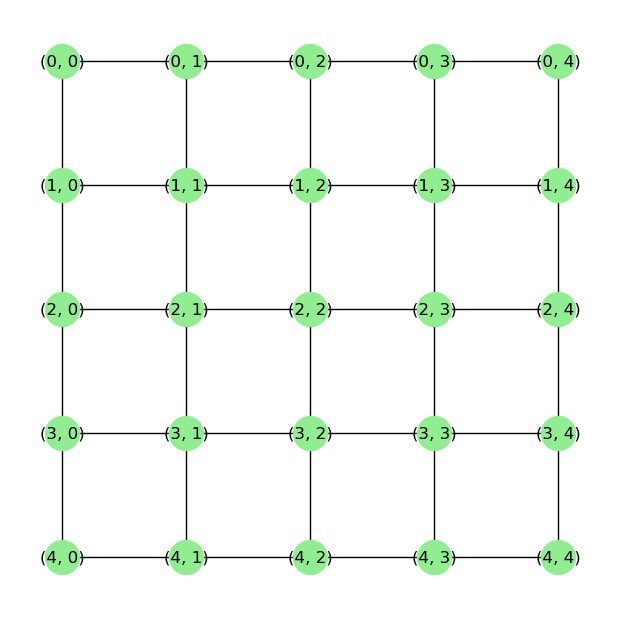

In [76]:
plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G_grid.nodes()}
nx.draw(G_grid, pos=pos, 
        node_color='lightgreen', 
        with_labels=True,
        node_size=600)

In [77]:
for node in G_grid.nodes():
    print(node)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)


In [78]:
#sample the random graph based on the contact probability function
G = nx.Graph()
for node1 in G_grid.nodes():
    for node2 in G_grid.nodes():
        if node1 != node2 and random.random() < contact_prob(distance, contact_density, node1[0], node1[1], node2[0], node2[1]):
            G.add_edge(node1, node2)

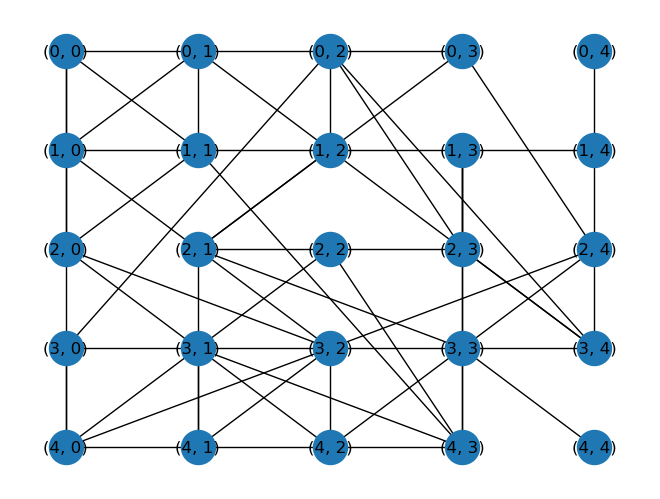

In [79]:
nx.draw(G, pos=pos, 
        with_labels=True,
        node_size=600)